# Week 2 - Polynomial Curve Fitting and Decision Theory

Learning contents:

1. Linear models
    - Linear function
    - Error function
    - Root meant square error
    - Optimization of Error function
    - Test the model
2. Regularization
    - Error function
    - Optimization
    - Test with regularization
3. Model Selection
    - Cross-validation
4. Bayesian curve fitting
    - Display results

## Description

In this exercise we will apply Linear Models for Polynomial Curve Fitting task.

You have to fill empty functions (with pass in body) to match their purpose.

1. You have to create a code for evaluation of a Linear Model, it's error functions and finding optimal weights with given error functions.
2. You need to add regularization to the optimization procedure.
3. You need to implement Cross-validation model selection technique.
4. You need to implement Bayesian curve fitting, computing phi and S matricies at first, then using them to compute mean and variance.

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import  exp

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

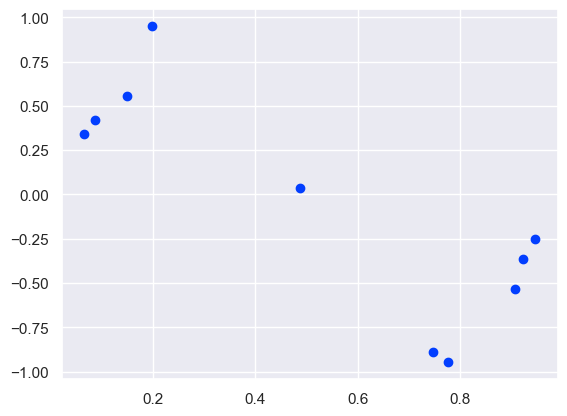

In [3]:
plt.scatter(x_train, y_train)

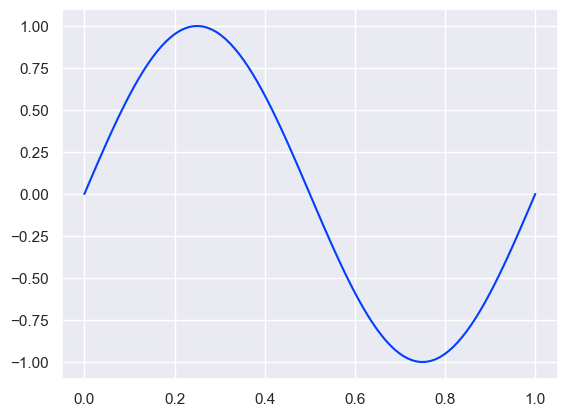

In [4]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

### 1.1) Linear function

Complete the function below, named `linear`, which takes two parameters: a single data point `x` and a list of `M` number of `weights`. The function should return an output value `y` as given in the equation on slide 6 of Lecture 3. In essence, this function should implement a polynomial of order `M`.   

In [ ]:
def linear(x, weights):
    pass

### 1.2) Error function

Complete the function below, named `err`, that computes the sum-of-squared error between the output of the function above and the corresponding target value. Specifically, the function should implement the error equation in slide 7 of Lecture 3. The function takes `weights`, `inputs` and `targets` as parameters

In [ ]:
def err(weights, inputs, targets):
    pass

### 1.3) Root meant square error

Write a function for computing the root mean squared error as given in the equation in slide 12 of Lecture 3

In [ ]:
def erms(weights, inputs, targets):
    pass

### 1.4) Optimization of Error function

Create a function below that obtains `optimial_weights` by implementing the optimization solution given in slide 9 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, and `M` (number of weights) as parameters and returns optimal weights for the given set of training data.

In [ ]:
def optimial_weights(inputs, targets, M):
    pass

### 1.5) Test the model

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figure.

In [ ]:
def test_all(start_M, end_M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for M in range(start_M, end_M + 1):
        weights = optimial_weights(x_train, y_train, M)
        all_weights.append(weights)
        error_train = erms(weights, x_train, y_train)
        error_test = erms(weights, x_test, y_test)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

r_tr, r_tt, all_weights = test_all(0, 9, x_train, y_train, x_test, y_test)

plt.plot(list(range(0, 10)), r_tr, '-o', label='train')
plt.plot(list(range(0, 10)), r_tt, '-o', label='test')
plt.xlabel('M')
plt.ylabel('ERMS')
plt.legend()
plt.yscale('log')

##### Weights table for different `M`

The following code lists the optimal weight vectors obtained for different model order `M` values. Explain what happens to the weights at large values of `M`.

In [ ]:
print(pd.DataFrame(all_weights))

##### Estimated curve for `M=9` (same as the amount of data points) 

In [ ]:
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights(x_train, y_train, 9)), x_test)), '-')
plt.plot(x_train, y_train, 'og')

## 2) Regularization

### 2.1) Error function

Implement the cost function `err_regularization` that takes into account the regularization term, as given in the equation on slide 16 of Lecture 3. The function should take `weights`, `inputs`, `targets` and `l` (lambda regularization term) as input parameters and compute sum-of-squared error with weight regularization.

In [ ]:
def err_regularization(weights, inputs, targets, l):
    pass

Write the `erms_regularization` function which is regularization version of a root mean squared error (slide 12 in lecture 3)

In [ ]:
def erms_regularization(weights, inputs, targets, l):
    pass

### 2.2) Optimization

Create a function below that obtains `optimial_weights` by implementing the optimization solution of the regularized problem as given in slide 16 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, `M` (number of weights) and `l` (regularization term) as parameters and returns optimal weights for the given set of training data.

In [ ]:
def optimial_weights_regularization(inputs, targets, M, l):
    pass

### 2.3) Test with regularization

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figures.

In [ ]:
def test_all_regularization(ls, M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for l in ls:
        weights = optimial_weights_regularization(x_train, y_train, M, l)
        all_weights.append(weights)
        error_train = erms_regularization(weights, x_train, y_train, l)
        error_test = erms_regularization(weights, x_test, y_test, l)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

ls = [0, exp(-18), exp(-5), exp(0)]

r_tr_r, r_tt_r, all_weights_r = test_all_regularization(ls, 9, x_train, y_train, x_test, y_test)

plt.plot(ls, r_tr_r, '-o', label='train')
plt.plot(ls, r_tt_r, '-o', label='test')
plt.xlabel('ln Lambda')
plt.ylabel('ERMS_REGULARIZATION')
plt.legend()
plt.yscale('log')
plt.xscale('log')

##### Weights for `M=9` with regularization terms `0`, `exp(-18)`, `exp(-5)`, `exp(0)`

In [ ]:
print(pd.DataFrame(np.transpose(all_weights_r)))

In [ ]:
def plot_by_lambda(l):
    plt.plot(x_test, y_test, '-m')
    plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, 9, l)), x_test)), '-')
    plt.plot(x_train, y_train, 'og')

In [ ]:
plot_by_lambda(exp(0))

In [ ]:
plot_by_lambda(exp(-5))

In [ ]:
plot_by_lambda(exp(-18))

In [ ]:
plot_by_lambda(0)

## 3) Model Selection

### 3.1) Cross-validation

Create a function named `create_cross_validation_sets` that takes `S` (number of sets) and training data points `x_train`, `y_train` as parameters and returns array of `S` number sets with each set in the form `[x_sub_train, y_sub_train, x_validation, y_validation]`. Refer to the figure in slide 20 of lecture 3.

In [ ]:
def create_cross_validation_sets(S, x_train, y_train):
    pass

Create the function, `best_model`, that loops through all integer values between `start_M`, `end_M` (low and high limits in search of optimal value of model order `M`), performs S-fold cross validation (as explained in lecture slides) and selects the best value `top_M` among all the considered values of M.  It also takes `ls` (a list of regularization parameters) and `sets` (cross-validation sets obtained from the output of previous function) and should return `(top_M, top_l, top_result_test)` with `M`, `l` and result for the best model.

In [ ]:
def best_model(start_M, end_M, ls, sets):
    pass


x_cross_train, y_cross_train, _, _ = generate_data(100) 

M, l, r = best_model(0, 9, [0, exp(-18), exp(-5), exp(0)], create_cross_validation_sets(10, x_cross_train, y_cross_train))
print('M =', M, 'lambda =', l, 'erms =', r)

plt.plot(x_test, y_test, '-m')
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, M, l)), x_test)), '-')

## 4) Bayesian curve fitting (Optional)

This exercise is optional. It requires an understanding of section 1.2.6 of the textbook which is given as a reading assignment after lecture 3. The function below `phi` takes `x` (data point) and `M` (number of weights) as arguments and returns a vector of powers of `x` from `0` to `M`

In [ ]:
def phi(x, M):
    pass

`S` takes `alpha`, `beta`, `x` (all data points), and `M` as arguments and returns a matrix `S` that is used to compute `mean` and `variance`

In [ ]:
def S(alpha, beta, x, M):
    pass

`mean` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian distribution

In [ ]:
def mean(alpha, beta, x_star, x, t, M):
    pass

`variance` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes variance for the Gaussian variance

In [ ]:
def variance(alpha, beta, x_star, x, t, M):
    pass

### 4.1) Display results

In [ ]:
alpha = 0.05
beta = 1.1
M = 9

means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, y_train, M), x_test)))

plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha='0.3')